In [136]:
import numpy as np
import matplotlib.pyplot as plt

## Very simple statistics concepst from scratch
- mean
- variance
- standard deviation
- covariance
- correlation coefficient

## Create 2D points between -5 and 5

In [137]:
a = np.random.uniform(-5, 5, size=(40,2))
a.shape

(40, 2)

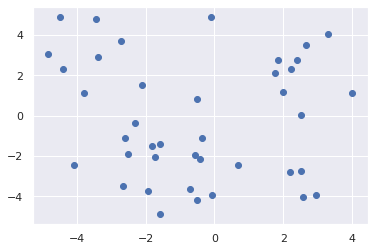

In [138]:
plt.scatter(a[:,0], a[:,1])

In [139]:
x = a[:,0]
y = a[:,1]

In [154]:
def eq(x1, x2):   return x1 - x2 < 1e5
def eq_m(m1, m2): return np.allclose(m1, m2, atol=1e-5)

## Arithmetic Mean

Also expected value or average.

$\bar{x} = \frac{1}{n}\left (\sum_{i=1}^n{x_i}\right ) = \frac{x_1+x_2+\cdots +x_n}{n}$

In [141]:
def mean(x): return sum(x) / len(x)

In [142]:
x_hat = mean(x)
assert eq(x_hat, x.mean())

y_hat = mean(y)
assert eq(y_hat, y.mean())

## Variance

How far away are the points on average from the mean.

Often represented by $\sigma^2, s^2, \operatorname{Var}(X)$

$\operatorname{Var}(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$

In [143]:
def var(x):
    x_hat = mean(x)
    s = 0
    for i in x: s += (x_hat - i)**2
    return s / len(x)

In [144]:
x_var = var(x)
assert eq(x_var, x.var())

y_var = var(y)
assert eq(y_var, y.var())

## Standard Deviation

Is the square root of the variance.

A useful property of the standard deviation is that, unlike the variance, it is expressed in the same units as the data. 

$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2 }$

In [145]:
def std(x): return var(x)**(1/2)

In [146]:
x_sigma = std(x)
assert eq(x_sigma, x.std())

y_sigma = std(y)
assert eq(y_sigma, y.std())

## Covariance

Is a measure of the joint variability of two variables.

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables.

For the intuition: https://www.youtube.com/watch?v=KDw3hC2YNFc

$\operatorname{cov} (X,Y)=\frac{1}{n}\sum_{i=1}^n (x_i-E(X))(y_i-E(Y))$

In [147]:
def cov(x1, x2):
    s = 0
    for i, j in zip(x1, x2): s += (i-mean(x1))*(j-mean(x2))
    return s/len(x1)

In [148]:
assert eq(cov(x,y), np.cov(a.T, ddof=0)[0,1])
assert eq(cov(x,y), np.cov(a.T, ddof=0)[1,0])

## Covariance Matrix

Is a square matrix giving the covariance between each pair of elements of a given random vector. In the matrix diagonal there are variances, the covariance of each element with itself. 

In [152]:
def cov_m(x1, x2):
    return [[cov(x1,x1), cov(x1,x2)],
            [cov(x2,x1), cov(x2,x2)]]

In [159]:
assert eq_m(cov_m(x,y), np.cov(x,y,ddof=0))

### Covariance Matrix as a linear transformation

Great article on this: https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

In [392]:
cov_matrix = [[5,3],[3,2]]

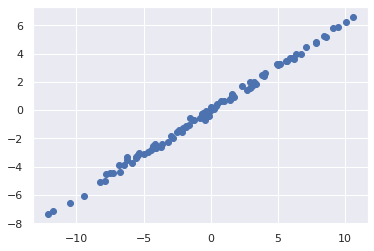

In [393]:
n = np.random.normal(size=(100,2))

p = n@cov_matrix
plt.scatter(p[:,0],p[:,1])

## Pearson Correlation Coefficient

Is the normalized Covariance.

It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

In [149]:
def r(x1, x2):
    return cov(x1,x2)/(std(x1)*std(x2))

In [151]:
assert eq(r(x,y), np.corrcoef(x,y)[0,1])
assert eq(r(x,y), np.corrcoef(x,y)[1,0])